In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [90]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy as sch

In [3]:
# Code starts here
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/customer_segmentation_kmeans.csv'

# Load dataframe
df = pd.read_csv(path)

# Describe numerical columns
df.describe()

# Shape of the dataset
df.shape

# Look at first five rows
df.head()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


(303, 2)

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

km.fit(df)

centroids = km.cluster_centers_

print(centroids)

wcss = km.inertia_
print(wcss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[265.58333333 117.44444444]
 [193.93478261 125.63043478]
 [301.07142857 152.91071429]
 [195.05769231 167.82692308]
 [242.03960396 160.46534653]
 [365.58333333 153.25      ]]
158865.83467962776


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[868805.4785478548,
 416914.67764462065,
 297101.3764201943,
 235568.75630353513,
 194388.74977425116,
 158865.83467962776,
 134701.5410234023,
 115291.00712004484,
 101407.55282890459]

<Figure size 1440x1440 with 0 Axes>

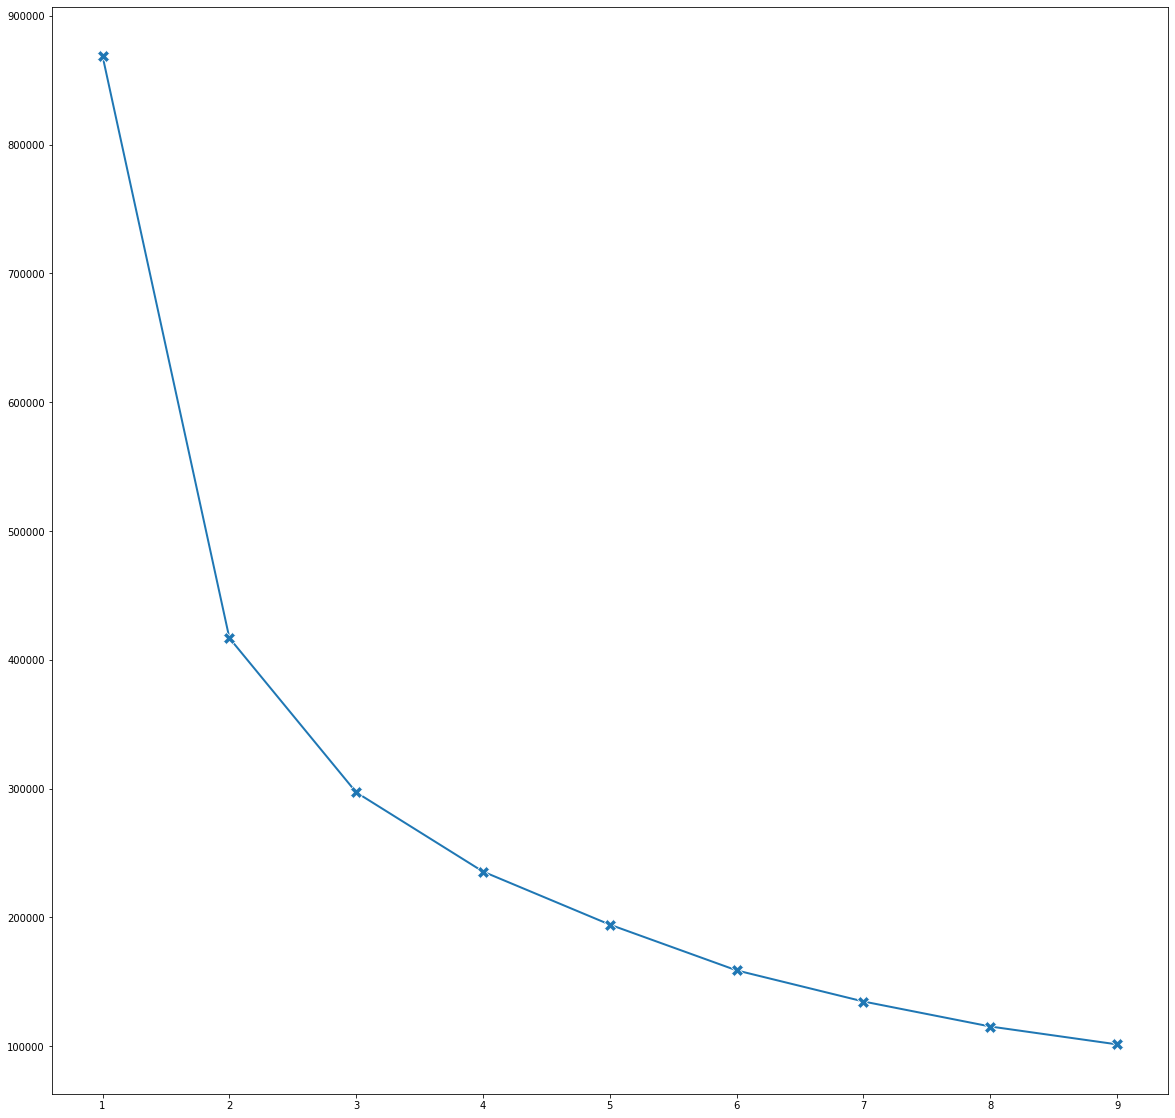

In [20]:
wcss = []

for i in range(1, 10):
    km = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)

wcss

plt.figure(figsize=(20,20))
sns.lineplot(x=range(1, 10), y=wcss, marker='X', linewidth=2, markersize=12)
plt.show()

<Figure size 1440x1440 with 0 Axes>

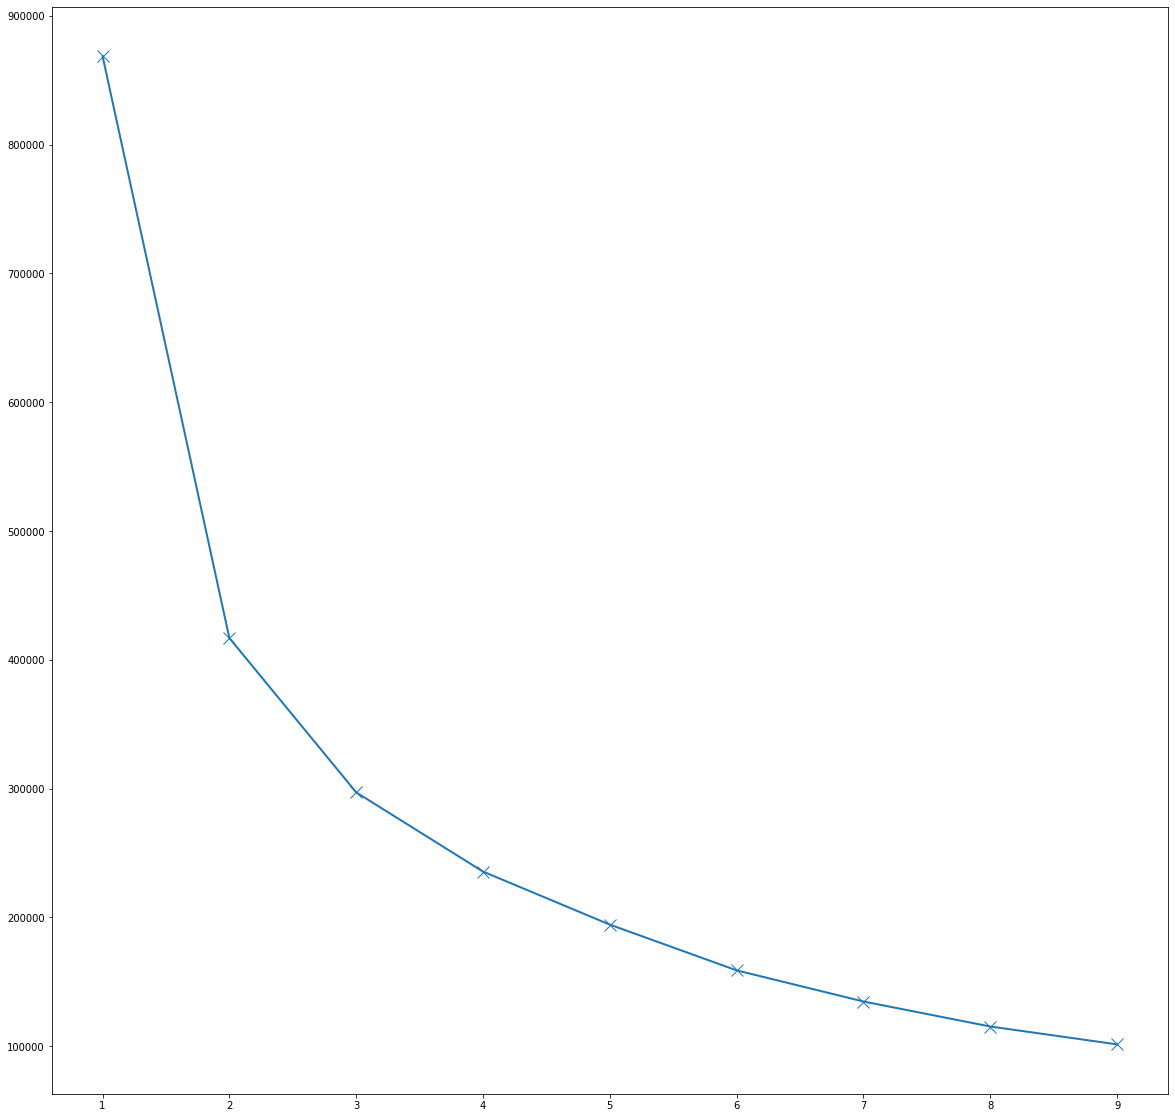

In [14]:
plt.figure(figsize=(20,20))
plt.plot(range(1, 10), wcss, marker='x', linewidth=2, markersize=12)
plt.show()


# **Hierarchical clustering**


- Initialize a figure fig and axes ax with plt.subplots()
- Draw a dendrogram dend with sch.dendrogram(sch.linkage(df, method='ward'), leaf_rotation=90, ax=ax_1)
- Set the title of the plot as 'Dendrogram'
- Set the label of X-axis as 'Customer' and that of Y-axis as 'euclidean'
- Display the plot with plt.show()

[Text(0, 0.5, 'Euclidean'),
 Text(0.5, 0, 'Customer'),
 Text(0.5, 1.0, 'Dendogram')]

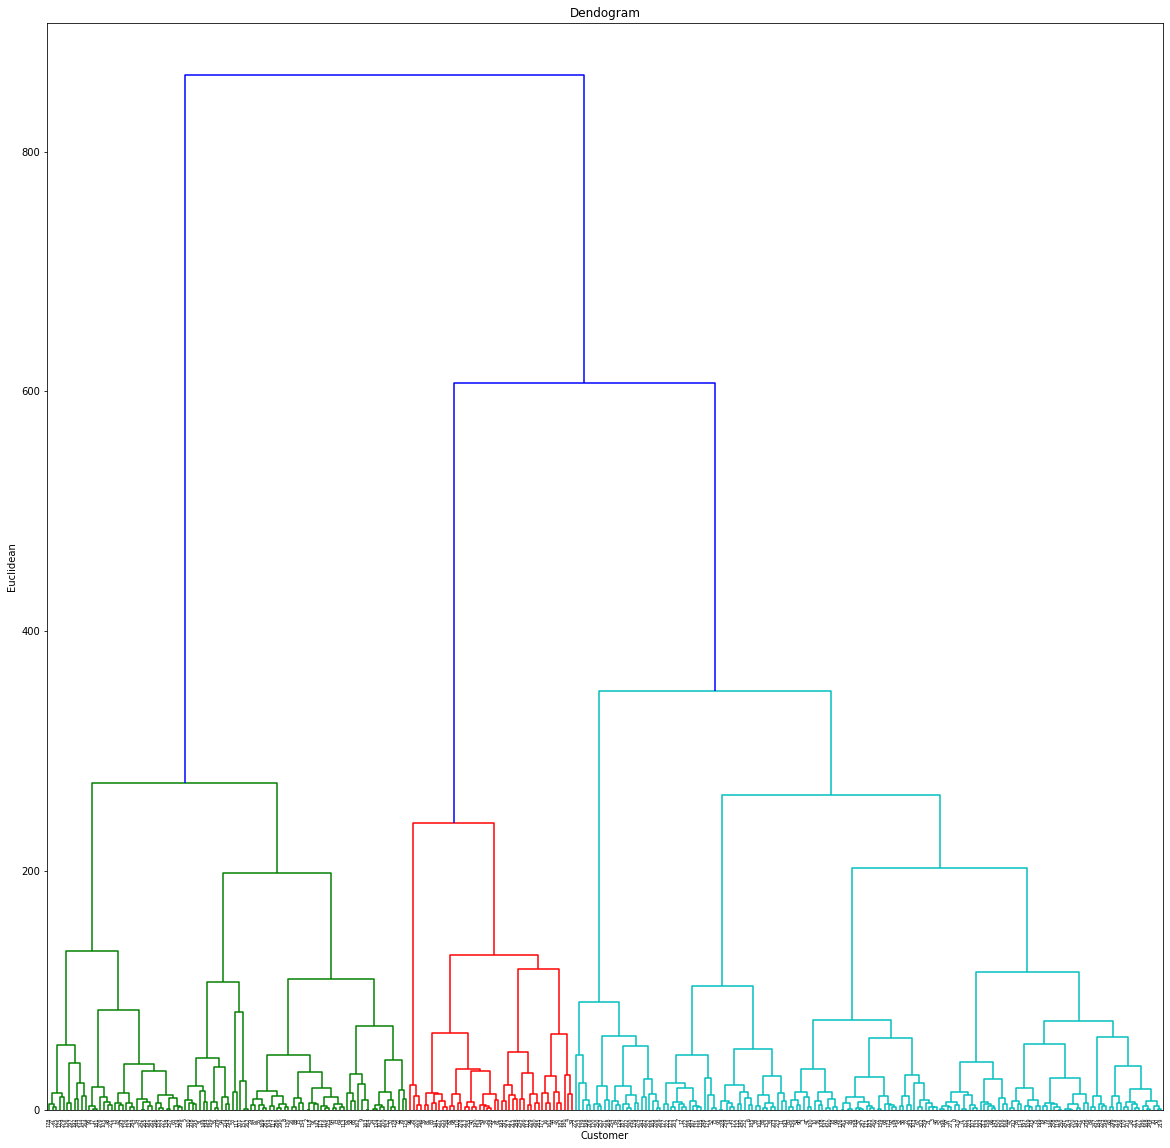

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
plot = sch.dendrogram(sch.linkage(df, method='ward'), leaf_rotation=90, ax = ax)
ax.set(title = 'Dendogram', xlabel = 'Customer', ylabel = 'Euclidean')
plt.show()

array([0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,

<Figure size 720x504 with 0 Axes>

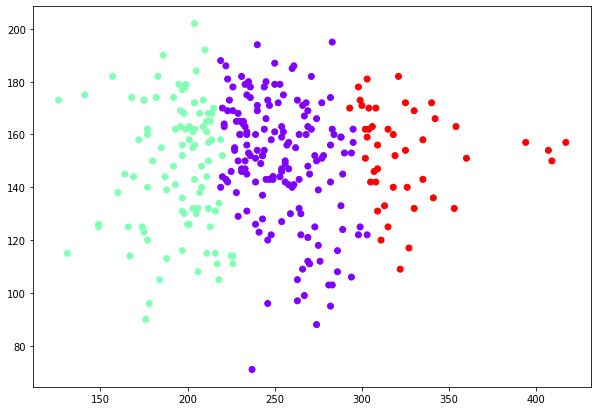

In [30]:
from sklearn.cluster import AgglomerativeClustering

# initialize Agglomerative clustering object with 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

# predict on dataset
cluster.fit_predict(df)

# scater plot
plt.figure(figsize=(10, 7))  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.plot(cluster.n_connected_components_)


# Assessment

- File path is given as path. Load dataframe for Offers as .read_excel(path, sheet_name=0) and save it as offers
- Load Transactions sheet as in the same way but with sheet_name=1 and save it as transactions
- Add a new column 'n' to transactions and set the value as 1 across all observations. This is done to identify customers who have purchased a particular offer
- Now merge offers and transactions into a single dataframe df
- Print out the first five rows of df using .head()

In [32]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Assessment_clustering.xlsx'

In [65]:
# offer = pd.read_excel(path, sheet_name='OfferInformation')
offers = pd.read_excel(path, sheet_name=0)

offers.head()

transactions = pd.read_excel(path, sheet_name=1)

transactions.head()

transactions['n'] = 1

transactions.head()

df = pd.merge(offers, transactions, how='inner', on='Offer #')

df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1




- Create a pivot table matrix using .pivot_table() on df with arguments index='Customer Last Name', columns='Offer #' and values='n'
- You will have a lot of missing values (since every customer did not purchase all the offers). Fill in the missing values by 0s. You can do it by .fillna(0, inplace=True)
- The last names of customers are on the index; translate it to a column using .reset_index(inplace=True) so that it is a column now
- Print out the first five rows of matrix now

In [76]:
matrix = pd.pivot_table(data=df, index='Customer Last Name', columns='Offer #', values='n')

matrix.fillna(0, inplace=True)

matrix.reset_index(inplace=True)

matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Initialize a KMeans object cluster with KMeans() and arguments as n_clusters=5, init='k-means++', max_iter=300, n_init=10 and random_state=0
- Create a new column 'cluster' in the dataframe matrix where you store the cluster centers for every observation from matrix. These cluster centers can be obtained using .fit_predict(matrix[matrix.columns[1:]) method of matrix. The first column isn't required as it contains the customer names
- Print out first five rows using .head() method of matrix



In [89]:
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0, n_init=10)

matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[ 1 :]])

matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


- Initialize a PCA object pca using PCA(n_components=2, random_state=0)
- Create a new column 'x' for matrix dataframe which denotes the X co-ordinates of every observation in decomposed form using .fit_transform(matrix[matrix.columns[1:])[:,0] method of pca
- Similarly create a new column 'y' which denotes the decomposed Y-co-ordinates of every observation using .fit_transform(matrix[matrix.columns[1:])[:,1]
- Create a new dataframe clusters containing the column numbers [0, 33, 34, 35] i.e. customer names, cluster it belongs to and X and Y co-ordinates of every observation respectively. You can use .iloc() method to achieve this
- Visualize clusters using .scatter(x='x', y='y', c='cluster', colormap='viridis'). This will help you visualzie data points according to clusters



<Figure size 1440x720 with 0 Axes>

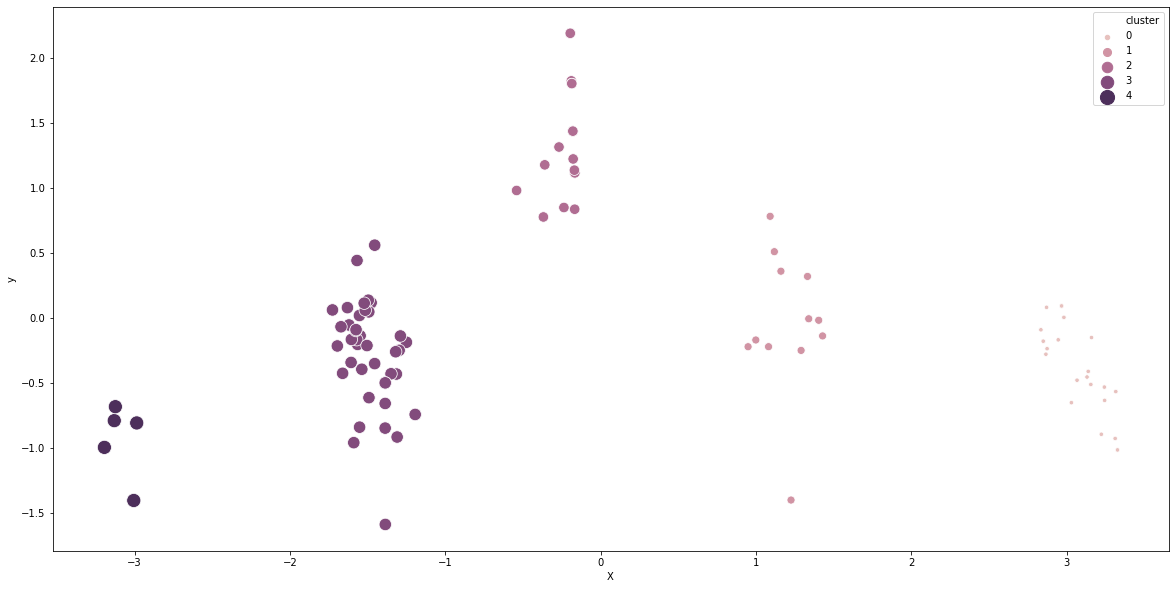

In [139]:
pca = PCA(n_components=2, random_state=0)

matrix['X'] = pca.fit_transform(matrix[matrix.columns[1 :]])[ : , 0]

matrix['y'] = pca.fit_transform(matrix[matrix.columns[1 :]])[ : , 1]

cluster = matrix.iloc[ : , np.r_[0,33,34,35]]

plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(dark=.1, light=.8, as_cmap=True)
sns.scatterplot(x='X', y='y', hue='cluster', data=cluster, cmap='viridis', size='cluster', 
                sizes=(20, 200), palette=cmap,legend="full", hue_norm=(0, 5))
plt.show()

> [Stackoverflow Link](https://stackoverflow.com/questions/41540021/what-would-be-python-pandas-equivalent-of-this-r-code-for-rearranging-columns-of/41540037#41540037)

In [143]:
# plt.scatter(x=cluster['X'], y=cluster['y'], c=cluster['cluster'])

# cluster.plot(kind='scatter', x='X', y='y', c='cluster', colormap='viridis')






- First merge dataframes clusters and transactions into a single dataframe using .merge() method of pandas. This will merge dataframes on Customer Last Name column and save it as data

- Again, use .merge() to merge offers and data and save it as data again

- Initialize an empty dictionary champagne. Here you will store cluster number (you have 5 clusters from the previous task) as keys and values as the number of champagne ordered (only if that cluster has maximum orders for type 'Champagne' in Varietal column)

- Iterate using a for loop over the cluster numbers. Since the clusters are numbered [0,1,2,3,4], you can iterate over range(0,5) or you can use data['cluster'].unique()

- Create a new dataframe new_df within this loop where you create dataframes for every cluster value (for example you will have a dataframe consisting of observations belonging to cluster number 0)

- Initialize a variable counts where you will sort the counts for every value of 'Varietal' column of new_df in a descending order using .value_counts(ascending=False)

- Now you will check if the very first entry of counts is 'Champagne'. Since variants of 'Varietal' are in the index of counts, use .index[0] and use an if condition to check if its value is 'Champagne'. If it is yes, append the cluster number (iterator in for loop) as key in champagne dictionary and its corresponding value counts[0] as the value of that key

- Once you have finished the for loop, it is time to find out the cluster which purchases the most 'Champagne'. You have the dictionary champagne and all you have to do is to return the cluster number (key of the dictionary) with the maximum value. Save the cluster number as cluster_champagne.

- Print out cluster_champagne to see which cluster purchases the most champagne!


In [205]:
data = pd.merge(cluster, transactions, how='inner', on='Customer Last Name')

data = pd.merge(offers, data)

champagne = {}

#data.groupby('Varietal')['cluster'].value_counts()

for i in data['cluster'].unique():
    new_df = data[data['cluster'] == i]
    counts = new_df['Varietal'].value_counts().sort_values(ascending=False)
    if counts.index[0] == 'Champagne' :
        champagne[i] = counts[0]
    cluster_champagne = max(champagne, key=champagne.get)
    

print(cluster_champagne)

3


> [Stackoverflow Link](https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary)








- Create an empty dictionary discount where keys are going to be cluster numbers and values will be average percentage of discount for the entire cluster
- Iterate over all the clusters using a for loop and create a dataframe new_df for every cluster within the loop
- Calculate the average percentage of discounts for new_df by first adding all the discount values and then dividing the total by total number of observations of new_df. Store it in counts
- Add the cluster number as key and its value counts as value to dictionary discount
- Now find out the cluster number with the maximum average discount percentage from cluster_discount and save it as cluster_discount


In [215]:
discount = {}

#data.groupby('cluster')['Discount (%)'].sum()/data.groupby('cluster')['Discount (%)'].count()

for i in data['cluster'].unique():
    new_df = data[data['cluster'] == i]
    counts = new_df['Discount (%)'].sum()/new_df.shape[0]
    discount[i] = counts

cluster_discount = max(discount, key=discount.get)